<a href="https://colab.research.google.com/github/Anzhir/simple_projects/blob/master/Fashion_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from keras.layers import Conv2D , MaxPool2D
from keras.layers import Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
#Load the data
(x_train , y_train) , (x_test , y_test)=tf.keras.datasets.fashion_mnist.load_data()
x_train=x_train.reshape((60000,28,28,1))
x_test=x_test.reshape((10000 , 28 , 28 , 1))

4423680/4422102 [==============================] - 0s 0us/step


In [3]:
#Scaling
x_train = (x_train / 255) 
x_test = (x_test / 255) 

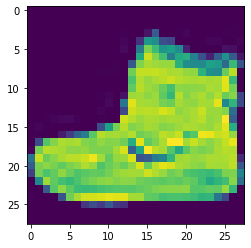

In [4]:
#visualise a sample
plt.imshow(x_train[0].reshape((28,28)))

In [5]:
x_train.shape

(60000, 28, 28, 1)

In [6]:
#Create the model
model=Sequential()
model.add(Conv2D(filters =32 , kernel_size=(3,3) , strides=(1,1) , activation ='relu' , padding = 'valid' , input_shape=(28, 28, 1)))
model.add(MaxPool2D( pool_size=(2,2) , padding='valid' ))
model.add(Flatten())
model.add(Dense(100,activation='relu'))
model.add(Dense(10 , activation='softmax'))
#Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [15]:
#data augmentation
train_datagen = ImageDataGenerator(
rotation_range = 15,
    width_shift_range = 0.1,
    height_shift_range = 0.1,
    shear_range = 0.1,
    zoom_range = 0.1,
    horizontal_flip = True,
    fill_mode = "nearest").flow(x_train , to_categorical(y_train))

In [17]:
#Create the call backs
from keras.callbacks import EarlyStopping
early=EarlyStopping(patience=4,monitor='val_loss')
#Train the model
model.fit(train_datagen,batch_size=32,  epochs=30,
   validation_data=(x_test , to_categorical(y_test)) , callbacks=[early]
)

Epoch 1/30
1875/1875 [==============================] - 19s 10ms/step - loss: 0.3834 - accuracy: 0.8577 - val_loss: 0.3588 - val_accuracy: 0.8768
Epoch 2/30
1875/1875 [==============================] - 19s 10ms/step - loss: 0.3762 - accuracy: 0.8588 - val_loss: 0.3652 - val_accuracy: 0.8732
Epoch 3/30
1875/1875 [==============================] - 19s 10ms/step - loss: 0.3682 - accuracy: 0.8613 - val_loss: 0.3418 - val_accuracy: 0.8801
Epoch 4/30
1875/1875 [==============================] - 19s 10ms/step - loss: 0.3675 - accuracy: 0.8619 - val_loss: 0.3340 - val_accuracy: 0.8834
Epoch 5/30
1875/1875 [==============================] - 19s 10ms/step - loss: 0.3583 - accuracy: 0.8650 - val_loss: 0.3551 - val_accuracy: 0.8824
Epoch 6/30
1875/1875 [==============================] - 19s 10ms/step - loss: 0.3545 - accuracy: 0.8663 - val_loss: 0.3409 - val_accuracy: 0.8808
Epoch 7/30
1875/1875 [==============================] - 19s 10ms/step - loss: 0.3503 - accuracy: 0.8689 - val_loss: 0.3647 -

In [18]:
test_img=x_test[0]
test_img.shape

(28, 28, 1)

In [19]:
test_img=test_img.reshape((1,28,28,1))

In [20]:
test_img.shape

(1, 28, 28, 1)

In [21]:
np.argmax(model.predict(test_img))

9

In [22]:
y_test[0]

9